# Basic Image Data Analysis Using Numpy and OpenCV - Part 1 

From https://www.kdnuggets.com/2018/07/basic-image-data-analysis-numpy-opencv-p1.html

Sheng Long 

I chose to use another picture because why not? 

## Importing images and observe its properties

In [19]:
if __name__=='__main__':
    import imageio
    import matplotlib.pyplot as plt
    %matplotlib inline 

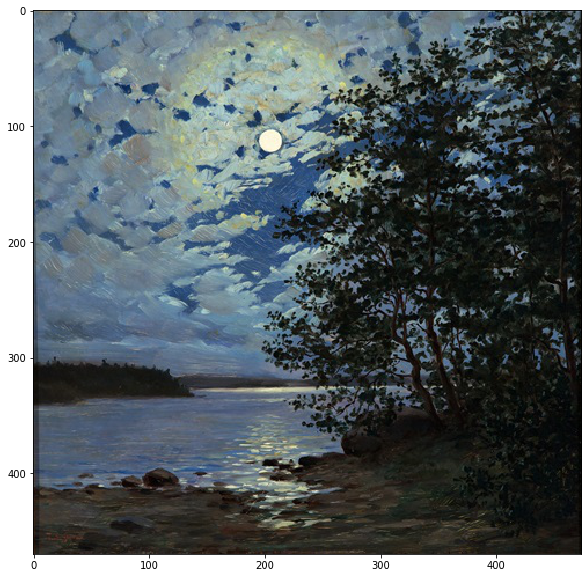

In [20]:
pic=imageio.imread(r'moon.jpg')
plt.figure(figsize=(10,10))

plt.imshow(pic)

### Observe basic properties of image 

In [21]:
print('Type of the image: ', type(pic))
print()
print('Shape of the image: {}'.format(pic.shape))
print('Image Height: {}'.format(pic.shape[0]))
print('Image Width: {}'.format(pic.shape[1]))
print('Dimension of Image: {}'.format(pic.ndim))

Type of the image:  <class 'imageio.core.util.Array'>

Shape of the image: (470, 474, 3)
Image Height: 470
Image Width: 474
Dimension of Image: 3


In [22]:
print('Image size: {}'.format(pic.size))
print('Maximum RGB value in this image: {}'.format(pic.max()))
print('Minimum RGB value in this image: {}'.format(pic.min()))

Image size: 668340
Maximum RGB value in this image: 255
Minimum RGB value in this image: 0


In [25]:
pic[100, 50]

# there is a discrepancy here - it says Array here but the website says Image? 

Array([105, 135, 145], dtype=uint8)

In [26]:
print('Value of only R channel: {}'.format(pic[100, 50, 0]))
print('Value of only G channel: {}'.format(pic[100, 50, 1]))
print('Value of only B channel: {}'.format(pic[100, 50, 2]))

Value of only R channel: 105
Value of only G channel: 135
Value of only B channel: 145


Taking a quick look at the **R channel:** 

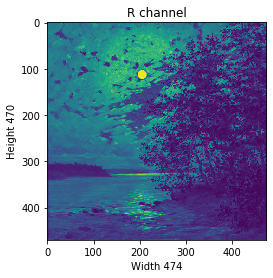

In [27]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:, :, 0])
plt.show()

And the **G channel**: 

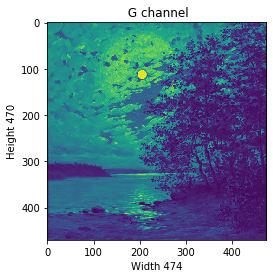

In [28]:
plt.title(' G channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:, :, 1])
plt.show()

And the **B channel**: 

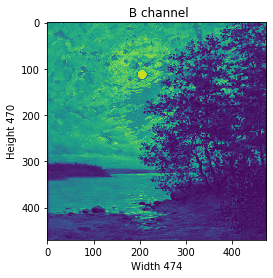

In [29]:
plt.title(' B channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[:, :, 2])
plt.show()

### Change the value of RGB values 

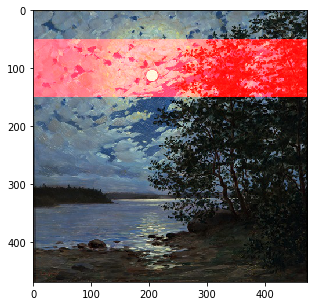

In [9]:
# full intensity to those pixel's R channel 
pic[50:150, :, 0] = 255 
plt.figure(figsize=(5,5))
plt.imshow(pic)
plt.show()

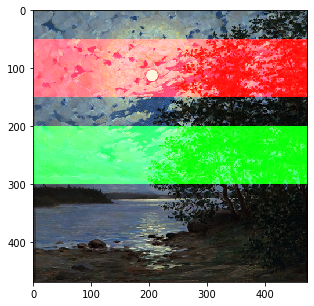

In [11]:
# full intensity to those pixel's G channel 
pic[200:300, :, 1] = 255
plt.figure(figsize=(5,5))
plt.imshow(pic)
plt.show()

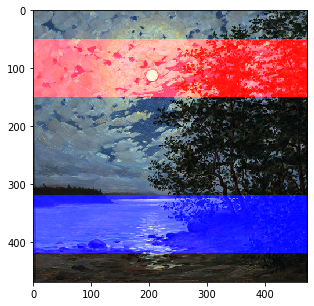

In [10]:
# full intensity to those pixel's B channel 
pic[320:420, :, 2] = 255
plt.figure(figsize=(5,5))
plt.imshow(pic)
plt.show()

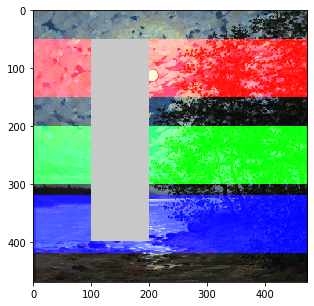

In [13]:
# changing simultaneously column and row values 
pic[50:400, 100:200, [0,1,2]] = 200
plt.figure(figsize=(5,5))
plt.imshow(pic)
plt.show()

### Splitting the image into separate color components 

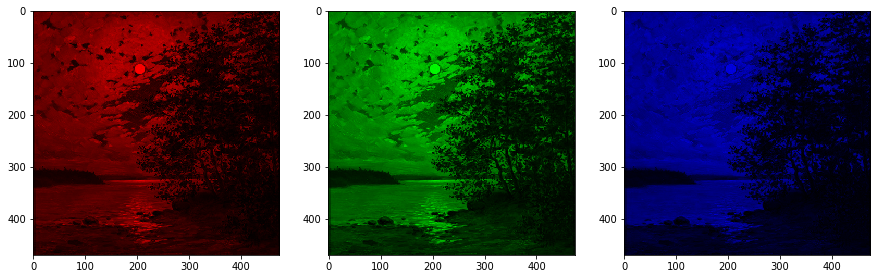

In [13]:
import numpy as np 

pic=imageio.imread('moon.jpg')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    # create zero matrix - blank canvas?  
    split_img = np.zeros(pic.shape, dtype='uint8') # 'dypte' by default is 'numpy.float64'
    # assigning each channel 
    split_img[:, :, c] = pic[:, :, c]
    # display each channel 
    ax.imshow(split_img)

### Greyscale 

Ranges of shades of gray: 0 - 255 

Many functions uses gray scale images before processing and this is done because it simplifies the image, acting almost as as noise reduction and increasing processing time as there's less information in the images. 

A straight forward way to convert image to grayscale is to take the weighted mean of the RGB value of the original image. 

$Y_{linear} = 0.2126 R_{linear} + 0.7152 G_{linear} + 0.0722 B_{linear}$ ?? Not really sure whether this is actually the one 

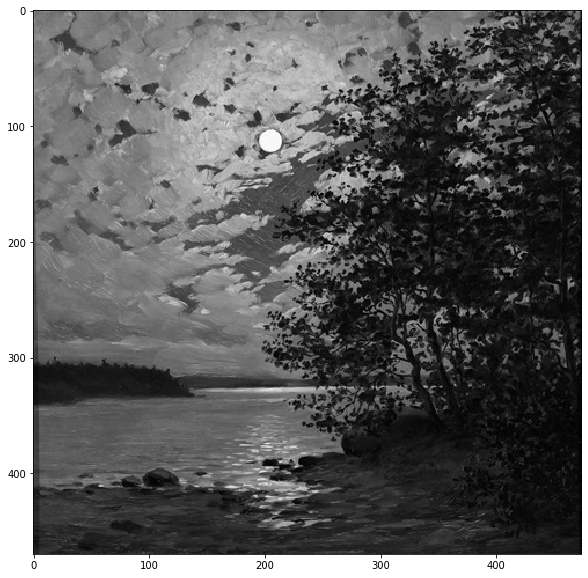

In [14]:
pic = imageio.imread('moon.jpg')
gray = lambda rgb:np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
gray_pic = gray(pic)

plt.figure(figsize=(10, 10))
plt.imshow(gray_pic, cmap=plt.get_cmap(name='gray'))
plt.show()

The GIMP converting color to grayscale image software has 3 algorithms. 

* **Lightness** $=\frac{1}{2}\times (\max{(R,G,B)} + \min{(R,G,B)})$
* **Luminosity** $= 0.21\times R + 0.72 \times G + 0.07 \times B$
* **Average** $= (R+G+B) \div 3$


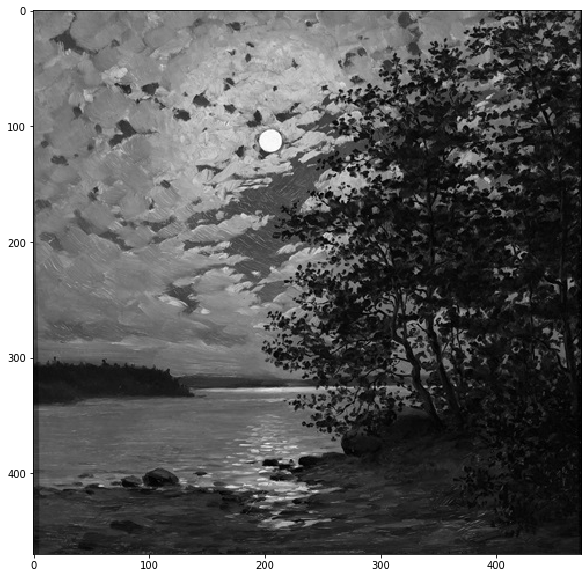

In [15]:
# Trying Luminosity 

pic = imageio.imread('moon.jpg')
gray = lambda rgb:np.dot(rgb[..., :3], [0.21, 0.72, 0.07])
gray_pic = gray(pic)

plt.figure(figsize=(10, 10))
plt.imshow(gray_pic, cmap=plt.get_cmap(name='gray'))
plt.show()

To check what has been changed about this image: ...


In [16]:
print('TYpe of the image: ', type(gray_pic))
print()
print('Shape of the image: {}'.format(gray_pic.shape))
print('Image Height: {}'.format(gray_pic.shape[0]))
print('Image Width: {}'.format(gray_pic.shape[1]))
print('Dimension of Image: {}'.format(gray_pic.ndim))
print()
print('Image size: {}'.format(gray_pic.size))
print('Maximum RGB value in this image: {}'.format(gray_pic.max()))
print('Minimum RGB value in this image: {}'.format(gray_pic.min()))
print('Random indices? [X,Y]: {}'.format(gray_pic[100, 50])) # How is this a random index? Also what is the plural form of index? 

TYpe of the image:  <class 'imageio.core.util.Array'>

Shape of the image: (470, 474)
Image Height: 470
Image Width: 474
Dimension of Image: 2

Image size: 222780
Maximum RGB value in this image: 254.01999999999998
Minimum RGB value in this image: 0.0
Random indices? [X,Y]: 129.4


# Preprocessing for Deep Learning: From covariance matrix to image whitening 

From https://www.kdnuggets.com/2018/10/preprocessing-deep-learning-covariance-matrix-image-whitening.html/2


In [17]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [18]:
# Create an array 
A = np.array([[1,3,5], [5,4,1], [3,8,6]])
A

array([[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]])

In [19]:
# calculate covariances with numpy function 
np.cov(A, rowvar=False, bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

Note that `rowvar=False` let's you calculate the column as vectors; `bias=True` divides by `n` and NOT `n-1`. 

In [20]:
def calculateCovariance(X):
    meanX = np.mean(X, axis=0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance 

In [21]:
calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [22]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix: \n', ACov)
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)
    
    ax0 = plt.subplot(2, 2, 1)
    
    # Choose the colors 
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)
    
    ax1 = plt.subplot(2, 2, 2,)
    # data can include the colors? 
    if data.shape[1] == 3:
        c=data[:, 2]
    else: 
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    
    # Remove the top and right axes from the data plot 
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

**Independent (uncorrelated) data** 

In [23]:
# create random data 

np.random.seed(1234)
a1 = np.random.normal(2,1,300)
a2 = np.random.normal(1,1,300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

In [24]:
A[:10, :]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

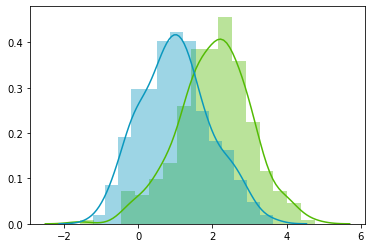

In [25]:
sns.distplot(A[:,0], color='#53BB04')
sns.distplot(A[:,1], color='#0A98BE')
plt.show()
plt.close()

Covariance matrix: 
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


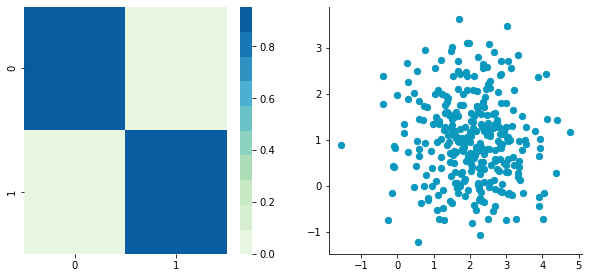

In [26]:
plotDataAndCov(A)
plt.show()
plt.close()

**Correlated data** 

In [27]:
np.random.seed(1234)
b1 = np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2
B = np.array([b1, b2]).T

Covariance matrix: 
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


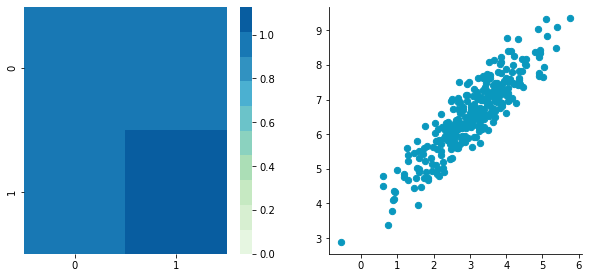

In [28]:
plotDataAndCov(B)
plt.show()
plt.close()

## Preprocessing 

### Mean normalization 

... has the effect of centering the data around 0. 

In [29]:
def center(X):
    newX = X - np.mean(X, axis=0)
    return newX

Before: 


Covariance matrix: 
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


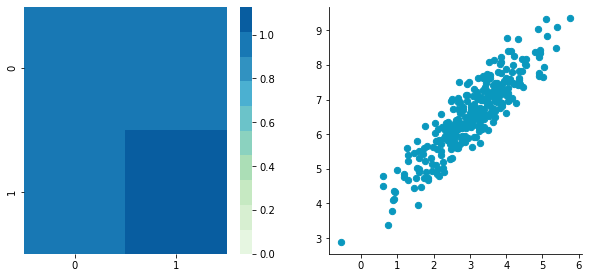

After: 


Covariance matrix: 
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


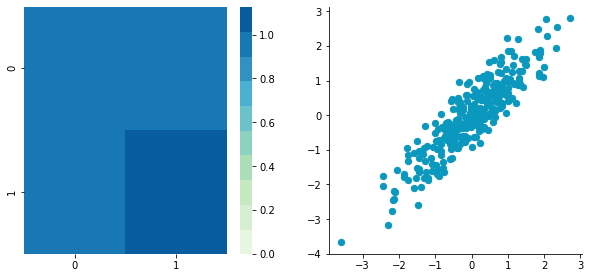

In [30]:
B_centered = center(B)

print('Before: \n\n')

plotDataAndCov(B)
plt.show()
plt.close()

print('After: \n\n')
plotDataAndCov(B_centered)
plt.show()
plt.close()

### Standardization / Normalization 

In [31]:
def standardize(X):
    newX = center(X) / np.std(X, axis=0)
    return newX

Covariance matrix: 
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


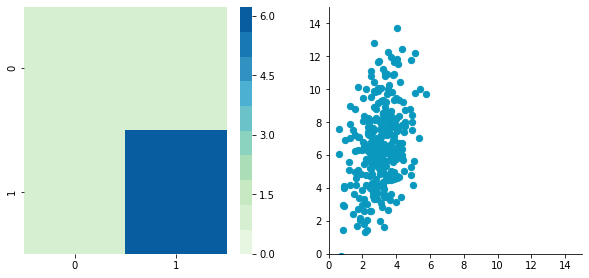

In [32]:
# create another dataset with a different scale 
np.random.seed(1234)
c1 = np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.0
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix: 
 [[1.         0.34500274]
 [0.34500274 1.        ]]


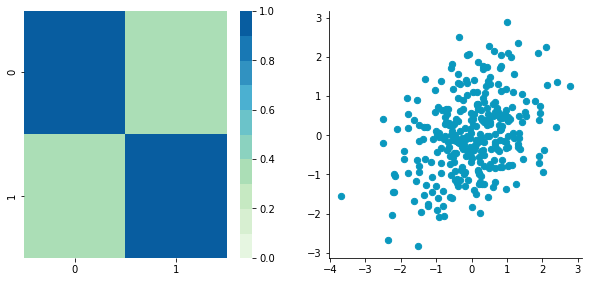

In [33]:
C_standardized = standardize(C)

plotDataAndCov(C_standardized)
plt.show()
plt.close()

### Whitening 

It involves the following steps: 
* zero-center the data 
* decorrelate the data 
* Rescale the data 

Covariance matrix: 
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


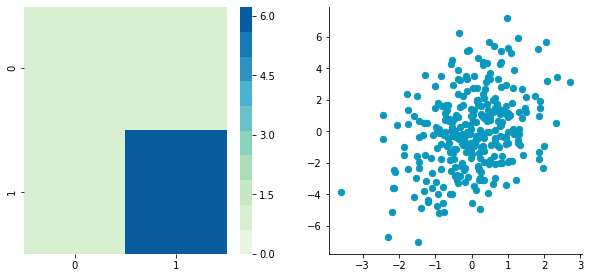

In [34]:
# zero-centering 
C_centered = center(C)

plotDataAndCov(C_centered)
plt.show()
plt.close()

In [35]:
# Decorrelate the data 

def decorrelate(X): 
    new_X = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate teh eigenvalues and eigenvectors of the covariance matrix 
    eigVals, eigVecs = np.linalg.eig(cov)
    # apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated 

Covariance matrix: 
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


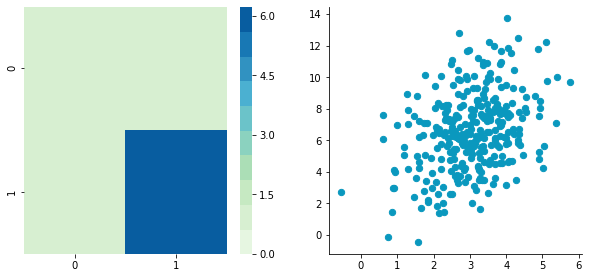

Covariance matrix: 
 [[8.21222171e-01 8.88178420e-17]
 [8.88178420e-17 6.35579346e+00]]


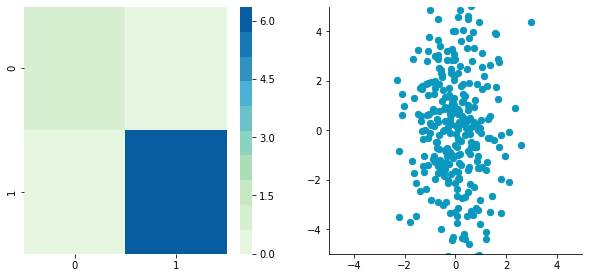

In [36]:
plotDataAndCov(C)
plt.show()
plt.close()

C_decorrelated = decorrelate(C_centered)
plotDataAndCov(C_decorrelated)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
plt.close()

The covariance matrix seems to be different from the website. Don't really know why. 

In [37]:
# Rescale the data 

def whiten(X):
    new_X = center(X)
    cov = X.T.dot(X) / float(X.shape[0])
    # calculate the eigenvalues and eigenvectors of the covariance matrix 
    eigVals, eigVecs = np.linalg.eig(cov)
    # apply the eigenvectors to X 
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data 
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened 

Covariance matrix: 
 [[9.99987823e-01 1.62832710e-17]
 [1.62832710e-17 9.99998427e-01]]


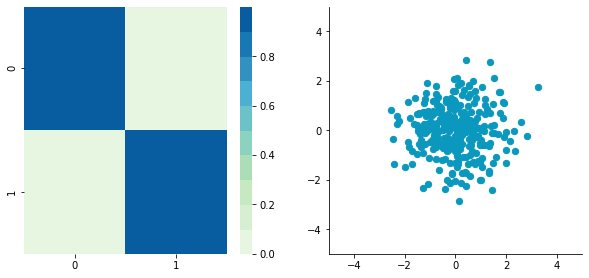

In [38]:
C_whitened = whiten(C_centered)

plotDataAndCov(C_whitened)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
plt.close() 

## Zero Component Analysis 

In [1]:
from keras.datasets import cifar10 

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

170500096/170498071 [==============================] - 12s 0us/step


(50000, 32, 32, 3)

In [3]:
X = X_train[:1000] 
print(X.shape)

(1000, 32, 32, 3)


In [4]:
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2] * X.shape[3])

print (X.shape)

(1000, 3072)


In [5]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32, 32, 3))
    plt.show()
    plt.close()

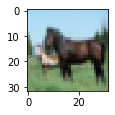

In [10]:
plotImage(X[12, :])

In [11]:
X_norm = X / 255.
print ('X.min() ', X_norm.min() )
print('X.max() ', X_norm.max())

X.min()  0.0
X.max()  1.0


In [12]:
X_norm.mean(axis=0).shape

(3072,)

In [14]:
X_norm.mean(axis=0)

array([0.5234    , 0.54323137, 0.5274    , ..., 0.50369804, 0.50011765,
       0.45227451])

In [15]:
X_norm = X_norm - X_norm.mean(axis=0)

In [16]:
X_norm.mean(axis=0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

In [18]:
import numpy as np 

cov = np.cov(X_norm, rowvar=True)

In [19]:
U, S, V = np.linalg.svd(cov)

In [20]:
print(U.shape, S.shape)

(1000, 1000) (1000,)


In [22]:
print(np.diag(S))
print('\nshape:', np.diag(S).shape)

[[8.15846654e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.68234845e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.41075267e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.92727365e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.52614473e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.35907202e-15]]

shape: (1000, 1000)


In [23]:
epsilon = 0.1

X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)

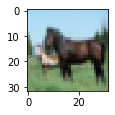

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


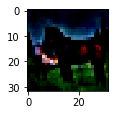

In [24]:
plotImage(X[12, :])
plotImage(X_ZCA[12, :])

Note here that the picture we produced is different from the website - jupyter notebook is doing some clipping? 

In [25]:
# do some rescaling 
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

print('min: ', X_ZCA_rescaled.min())
print('max: ', X_ZCA_rescaled.max())

min:  0.0
max:  1.0


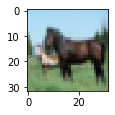

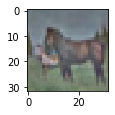

In [27]:
plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])

# Implementation of Book - Part 2  

### The not NN part 

In [121]:
2 * 3 

6

In [122]:
print('Hello, World!')

Hello, World!


In [123]:
x = 10 
print(x)
print(x+10)

y = x+7
print(y)

print(z)

10
20
17


NameError: name 'z' is not defined

In [124]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [125]:
for n in range(10):
    print(n)
print('Done!')

0
1
2
3
4
5
6
7
8
9
Done!


In [128]:
for n in range(10):
    print('The square of ', n, " is ", n*n)
print('Done!')

The square of  0  is  0
The square of  1  is  1
The square of  2  is  4
The square of  3  is  9
The square of  4  is  16
The square of  5  is  25
The square of  6  is  36
The square of  7  is  49
The square of  8  is  64
The square of  9  is  81
Done!


In [129]:
print(2**3)

8


In [130]:
def avg(x,y):
    print('first input is', x)
    print('second input is ', y)
    a = (x+y)/2.0
    print('average is', a)
    return a 

In [131]:
avg(2,4)

first input is 2
second input is  4
average is 3.0


3.0

In [132]:
avg(200, 301)

first input is 200
second input is  301
average is 250.5


250.5

In [133]:
a = np.zeros([3, 2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [134]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


In [135]:
print(a[0,1])
v = a[1,0]
print(v)

2.0
9.0


In [136]:
a[0,2]

IndexError: index 2 is out of bounds for axis 1 with size 2

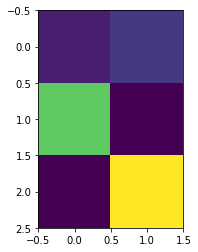

In [137]:
matplotlib.pyplot.imshow(a, interpolation='nearest')

In [138]:
# class for a dog object 
class Dog:
    def bark(self):
        print("woof!")

sizzles = Dog()
sizzles.bark()

woof!


In [139]:
mutley = Dog()
sizzles.bark()
mutley.bark()

woof!
woof!


In [140]:
class Dog:
    def __init__(self, petname, temp):
        self.name = petname;
        self.temperature = temp; 
        
    def status(self):
        print('dog name is ', self.name)
        print('dog temperature is ', self.temperature)
    
    def setTemperature(self, temp):
        self.temperature = temp; 
    
    def bark(self):
        print('woof!')

In [142]:
lassie = Dog('Lassie', 37)
lassie.status()

dog name is  Lassie
dog temperature is  37


In [143]:
lassie.setTemperature(40)
lassie.status()

dog name is  Lassie
dog temperature is  40


### The Neural Network Class 

For a 3-layer neural network. 

In [144]:
import numpy as np 
import scipy.special 

# Neural Network class definition 
class neuralNetwork: 
    
    # initialise the neural network 
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes 
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate 
        self.lr = learningrate
        
        # wih = input -> hidden 
        # who = hidden -> output 
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function is sigmoid function 
        self.activation_function = lambda x: scipy.special.expit(x)
        # inverse activation function 
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass 
    
    
    # train the neural network 
    def train(self, inputs_list, targets_list):
        # convert inputs list into 2d array 
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer 
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer 
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer 
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate signals emerging out of final output layer 
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error = target - actual (no squared?)
        output_errors = targets - final_outputs
        # hidden layer error is output errors split by weights and recombined
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for links between hidden and output layers 
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

        # update the weights for links between input and hidden layers 
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass 
    
    # query the neural network 
    def query(self, inputs_list):
        # convert inputs list to 2d array 
        inputs = np.array(inputs_list, ndmin = 2).T
        
        # calculate signals into hidden layer 
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate singals emerging from hidden layer 
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer 
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate signals emerging from final output layer 
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = np.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = np.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

Initialize a NN: 

In [97]:
# number of input, hidden, and output nodes 
input_nodes = 784  # 784 = 28 * 28 
hidden_nodes = 100
output_nodes = 10 

# learning rate 
learning_rate = 0.3 

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

### Testing and training small (100) dataset 

In [95]:
# load training data (small)
training_data_file = open('mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# load testing data (small)
test_data_file = open('mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#### Example of loaded image 

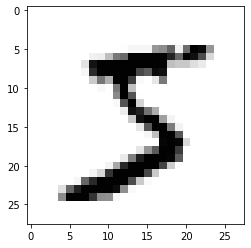

In [57]:
import numpy as np 
import matplotlib.pyplot 
%matplotlib inline 

all_values = training_data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

#### Training: 

In [58]:
# go through all records in the training data set

for record in training_data_list:
    # split by comma 
    all_values = record.split(',')
    # scale and shift the inputs from 0 - 255 to 0.01 - 0.99
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # create the target output value (all 0.01 except for target which is 0.99)
    targets = np.zeros(output_nodes) + 0.01 
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

In [96]:
# scorecard for performance 
scorecard = [] 

for record in test_data_list:
    # split by comma 
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print("correct label is {}".format(correct_label))
    # scale and shift inputs 
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    # query the network 
    outputs = n.query(inputs)
    # index of highest value correspond to label 
    label = np.argmax(outputs)
    print("network's answer is {}".format(label))
    # append correct/incorrect answer 
    if (label == correct_label):
        scorecard.append(1)
    else: 
        scorecard.append(0)
        pass 
    print("")

correct label is 7
network's answer is 7

correct label is 2
network's answer is 2

correct label is 1
network's answer is 1

correct label is 0
network's answer is 0

correct label is 4
network's answer is 4

correct label is 1
network's answer is 1

correct label is 4
network's answer is 4

correct label is 9
network's answer is 9

correct label is 5
network's answer is 5

correct label is 9
network's answer is 9



In [65]:
print(scorecard)
print("Performance of 3-layer NN is {}".format(np.asarray(scorecard).sum() / len(scorecard)))

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Performance of 3-layer NN is 0.6


### Example of testing and training full dataset 

Full dataset obtained from https://pjreddie.com/projects/mnist-in-csv/

In [98]:
# load full training data - about 100 MB 
training_data_file = open('mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# load full testing data 
test_data_file = open('mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [102]:
# go through all records in the training data set
# right now just train for one epoch 

import time 

def train(epoch): 
    for e in range(epoch):
        t0 = time.time() 
        for record in training_data_list:
            # split by comma 
            all_values = record.split(',')
            # scale and shift the inputs from 0 - 255 to 0.01 - 0.99
            inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output value (all 0.01 except for target which is 0.99)
            targets = np.zeros(output_nodes) + 0.01 
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
        t1 = time.time() 
        print('Epoch {} done, took {} seconds'.format(e, t1 - t0))
        
train(1) 

Epoch 0 done, took 52.080615758895874 seconds


In [103]:
def test(): 
    # scorecard for performance 
    scorecard = [] 

    # for loop for test records 
    for record in test_data_list:
        # split by comma 
        all_values = record.split(',')
        correct_label = int(all_values[0])
        # scale and shift inputs 
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
        # query the network 
        outputs = n.query(inputs)
        # index of highest value correspond to label 
        label = np.argmax(outputs)
        # append correct/incorrect answer 
        if (label == correct_label):
            scorecard.append(1)
        else: 
            scorecard.append(0)
            pass 

    # Performance 
    print("Performance of 3-layer NN is {}".format(np.asarray(scorecard).sum() / len(scorecard)))

test() 

Performance of 3-layer NN is 0.9539


94.96% accuracy with 3-layer NN and 100 hidden nodes


#### Improving the NN

i.e. change the learning rate, epoch, hidden nodes, etc. 

In [146]:
# Adjusting the learning rate to 0.1 
# the epoch to 7, the hidden nodes to 200

learning_rate = 0.1
hidden_nodes = 200 
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
  
# number of times we are training 
epochs = 7 

# train 
train(epochs) 

# test 
t0 = time.time() 
test()
t1 = time.time() 
print('Testing took {} seconds.'.format(t1 - t0))

Epoch 0 done, took 182.42450308799744 seconds
Epoch 1 done, took 182.18703079223633 seconds
Epoch 2 done, took 189.53828740119934 seconds
Epoch 3 done, took 188.45523834228516 seconds
Epoch 4 done, took 187.1111238002777 seconds
Epoch 5 done, took 184.9199140071869 seconds
Epoch 6 done, took 185.76066374778748 seconds
Performance of 3-layer NN is 0.9731
Testing took 5.423118591308594 seconds.


After tweaking the model (learning rate = 0.1, epochs = 7, hidden nodes = 200), the accuracy obtained is 0.9731.

# Book Part 3 

## Use own data 

I created my own data instead of using the ones provided by the author. 

In [148]:
import glob
# create own data set 

my_data = [] 

# read images 
for image_file_name in glob.glob('my_data/num_?.png'):
    print ('loading ...', image_file_name)
    # use the filename to set the correct label 
    label = int(image_file_name[-5:-4])
    # load image from png file into an array 
    img_array = imageio.imread(image_file_name, as_gray=True)
    # reshape from 28*28 to list of 784 values
    img_data = 255.0 - img_array.reshape(784)
    # scale data to 0.01 - 1.0 
    img_data = (img_data / 255.0 * 0.99) + 0.01 
    # append label and data to test data set 
    record = np.append(label, img_data)
    print(record)
    my_data.append(record)

loading ... my_data\num_0.png
[0.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01      

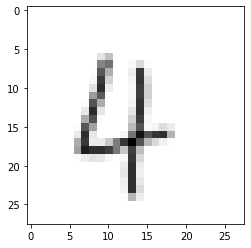

In [149]:
# show my data 
matplotlib.pyplot.imshow(my_data[3][1:].reshape(28,28), cmap='Greys', interpolation='None')

In [150]:
print(len(my_data))
print(my_data[8])

9
[9.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01388235 0.09541176 0.11094118 0.04882353
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.16917649
 0.5729411

[[1.18052076e-02]
 [2.85949614e-02]
 [9.47216867e-01]
 [1.46345518e-02]
 [3.15904403e-03]
 [6.77604963e-03]
 [6.90673787e-04]
 [4.84272832e-03]
 [5.21611963e-04]
 [3.45544384e-04]]
Network says  2
Match! 


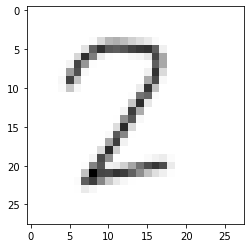

In [158]:
# I am using the improved NN from before with 
# (learning rate = 0.1, epochs = 7, hidden nodes = 200)

# record to test 
item = 2

# plot image 
matplotlib.pyplot.imshow(my_data[item][1:].reshape(28, 28), cmap='Greys', interpolation='None')

# correct label = first value 
correct_label = my_data[item][0]
# data is remaining values 
inputs = my_data[item][1:]

# query the network 
outputs = n.query(inputs)
print(outputs)

# index of highest value = label 
label = np.argmax(outputs)
print('Network says ', label)
if (label == correct_label):
    print('Match! ')
else:
    print('No match! ')

## Back query 

Epoch 0 done, took 172.696031332016 seconds
Epoch 1 done, took 180.51340246200562 seconds
Epoch 2 done, took 168.91974782943726 seconds
Epoch 3 done, took 176.29026675224304 seconds
Epoch 4 done, took 190.31378865242004 seconds
Performance of 3-layer NN is 0.9737
[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


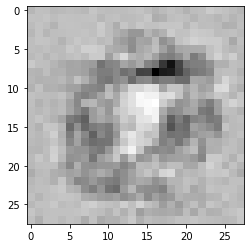

In [145]:
# Creat a new NN
hidden_nodes = 200 
learning_rate = 0.1 
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

epochs = 5

# training in epochs 
train(epochs)

# testing 
test() 

# run the network backwards, given a label, see what image it produces

# label to test
label = 0
# create the output signals for this label
targets = np.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

### Rotation 

#### Demonstrate Rotation 

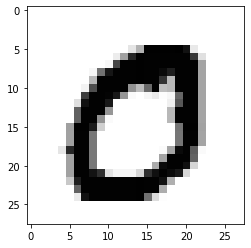

In [86]:
# use the small file 
data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

# scale input 
all_values = data_list[51].split(',')
scaled_input = ((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01).reshape(28,28)

# Original Image 
matplotlib.pyplot.imshow(scaled_input, cmap='Greys', interpolation='None')

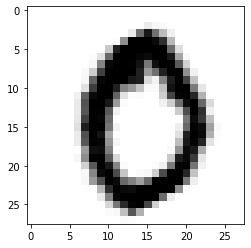

In [88]:
# rotated anticlockwise by 30 degrees
inputs_plus10_img = scipy.ndimage.rotate(scaled_input, 30.0, cval=0.01, order=1, reshape=False)
# rotated clockwise by 30 degrees
inputs_minus10_img = scipy.ndimage.rotate(scaled_input, -30.0, cval=0.01, order=1, reshape=False)

matplotlib.pyplot.imshow(inputs_plus10_img, cmap='Greys', interpolation='None')

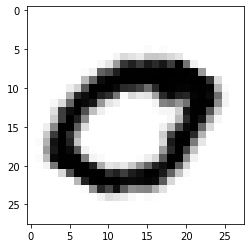

In [89]:
matplotlib.pyplot.imshow(inputs_minus10_img, cmap='Greys', interpolation='None')

#### Training NN with rotated data: 

In [83]:
import scipy.ndimage 

# simple NN
learning_rate = 0.1
hidden_nodes = 200 
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # create rotated variations 
    # anticlockwise 
    inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), 10, cval=0.01, reshape=False)
    # clockwise 
    inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), -10, cval=0.01, reshape=False)
    
    # create the target output value (all 0.01 except for target which is 0.99)
    targets = np.zeros(output_nodes) + 0.01 
    targets[int(all_values[0])] = 0.99
    # train with all three data sets 
    n.train(inputs, targets)
    n.train(inputs_minus10_img.reshape(784), targets)
    n.train(inputs_plus10_img.reshape(784), targets)
    
# test performance 
test() 

Performance of 3-layer NN is 0.9642


Performance is 0.9642 with learning rate = 0.1, hidden nodes = 200. 